<a href="https://colab.research.google.com/github/Samirdanish55/shopping-trends-retail-analysis/blob/main/Shopping_Trend_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Retail Sales Analysis – Shopping Trends Dataset

## Objective
- Analyze retail sales data to answer business questions
- Identify top products and seasonal trends
- Compute KPIs such as Total Revenue and Average Order Value
- Visualize insights
- Export a one-page business summary with charts


In [2]:
!pip install reportlab
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from reportlab.platypus import SimpleDocTemplate, Paragraph, Image, Spacer
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib.pagesizes import A4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 36.2 MB/s eta 0:00:00


In [3]:
sales = pd.read_csv("/content/shopping_trends_updated.csv")

sales.head()


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
sales.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [5]:
sales.describe()


,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [6]:
# Check missing values
sales.isnull().sum()


,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


In [7]:
# Ensure Purchase Amount is numeric
sales["Purchase Amount (USD)"] = pd.to_numeric(
    sales["Purchase Amount (USD)"], errors="coerce"
)


In [8]:
total_revenue = sales["Purchase Amount (USD)"].sum()
total_revenue


np.int64(233081)

In [9]:
average_order_value = sales["Purchase Amount (USD)"].mean()
average_order_value


np.float64(59.76435897435898)

In [10]:
top_products = (
    sales.groupby("Item Purchased")["Purchase Amount (USD)"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

top_products


,Purchase Amount (USD)
Item Purchased,
Blouse,10410
Shirt,10332
Dress,10320
Pants,10090
Jewelry,10010


In [11]:
top_regions = (
    sales.groupby("Location")["Purchase Amount (USD)"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

top_regions


,Purchase Amount (USD)
Location,
Montana,5784
Illinois,5617
California,5605
Idaho,5587
Nevada,5514


In [12]:
seasonal_sales = (
    sales.groupby("Season")["Purchase Amount (USD)"]
    .sum()
    .sort_values(ascending=False)
)

seasonal_sales


,Purchase Amount (USD)
Season,
Fall,60018
Spring,58679
Winter,58607
Summer,55777


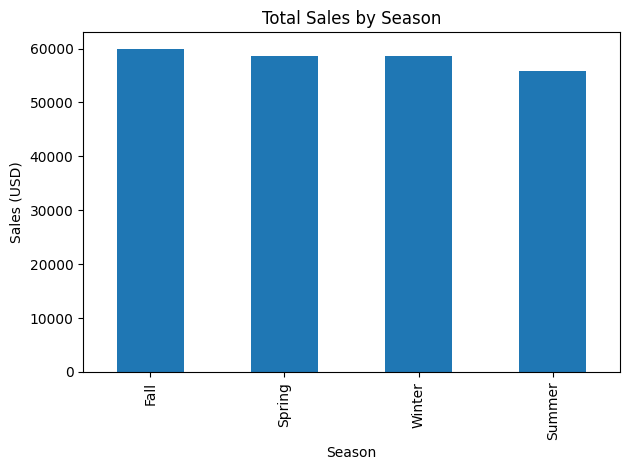

In [13]:
plt.figure()
seasonal_sales.plot(kind="bar")
plt.title("Total Sales by Season")
plt.xlabel("Season")
plt.ylabel("Sales (USD)")
plt.tight_layout()
plt.savefig("sales_by_season.png")
plt.show()


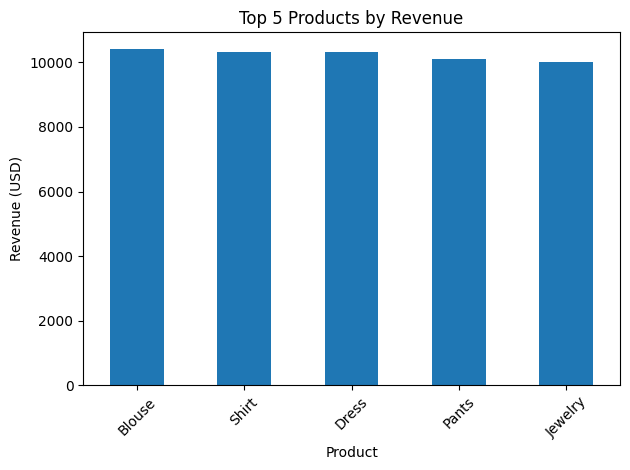

In [14]:
plt.figure()
top_products.plot(kind="bar")
plt.title("Top 5 Products by Revenue")
plt.xlabel("Product")
plt.ylabel("Revenue (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("top_products.png")
plt.show()


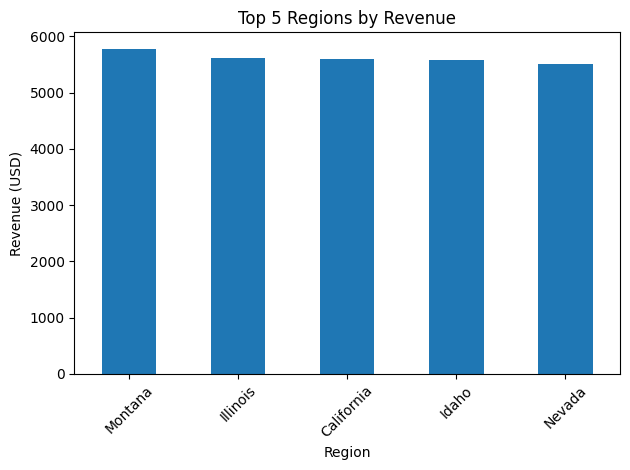

In [15]:
plt.figure()
top_regions.plot(kind="bar")
plt.title("Top 5 Regions by Revenue")
plt.xlabel("Region")
plt.ylabel("Revenue (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("top_regions.png")
plt.show()


## Key Business Insights
- Clothing items dominate total revenue
- Average order value is stable across customers
- Fall season generates the highest sales
- Certain regions consistently outperform others


## Business Recommendations
1. Increase inventory for top-selling products
2. Launch targeted campaigns during Fall season
3. Focus marketing efforts on high-performing regions
4. Use promotions strategically to increase AOV


In [16]:
pdf_file = "Retail_Sales_One_Page_Summary.pdf"

doc = SimpleDocTemplate(pdf_file, pagesize=A4)
styles = getSampleStyleSheet()

story = []

story.append(Paragraph(
    "<b>Retail Sales Analysis – One Page Summary</b>",
    styles["Title"]
))
story.append(Spacer(1, 12))

story.append(Paragraph(
    f"<b>Total Revenue:</b> ${total_revenue:,.2f}",
    styles["Normal"]
))
story.append(Paragraph(
    f"<b>Average Order Value:</b> ${average_order_value:,.2f}",
    styles["Normal"]
))

story.append(Spacer(1, 12))
story.append(Paragraph("<b>Key Visual Insights</b>", styles["Heading2"]))

story.append(Spacer(1, 12))
story.append(Image("sales_by_season.png", width=400, height=250))
story.append(Spacer(1, 12))
story.append(Image("top_products.png", width=400, height=250))

story.append(Spacer(1, 12))
story.append(Paragraph("<b>Recommendations</b>", styles["Heading2"]))

story.append(Paragraph(
    """
    • Focus on top-selling products<br/>
    • Strengthen seasonal promotions<br/>
    • Target high-revenue regions<br/>
    • Optimize pricing strategies
    """,
    styles["Normal"]
))

doc.build(story)

pdf_file


'Retail_Sales_One_Page_Summary.pdf'

In [17]:
from google.colab import files
files.download("Retail_Sales_One_Page_Summary.pdf")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
